# Part 1: Analyze + document

Import pandas, which we use to analyze data

In [1]:
import pandas as pd

Locate the data file

In [2]:
%ls

env/                     requirements.txt         rr-intro-data-v0.2/      rr-intro-exercise.ipynb


Read the Gapminder 1950-1960 data in from CSV file

In [3]:
gapminder_5060 = pd.read_csv('rr-intro-data-v0.2/intro/data/gapminder-5060.csv')

Subset the data since we're only interested in Canada

In [4]:
canada_life_exp = gapminder_5060[gapminder_5060['country'] == 'Canada']

Configure our plotting library to display inline

In [5]:
%matplotlib inline

> Visualize life expectancy over time for Canada in the 1950s and 1960s using a line plot.

Plot life expectancy over time

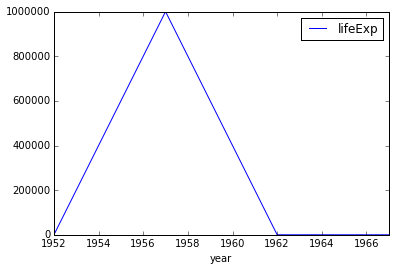

In [6]:
canada_life_exp[['year','lifeExp']].plot(kind='line', x='year', y='lifeExp')
pass

> Something is clearly wrong with this plot! Turns out there's a data error in the data file: life expectancy for Canada in the year 1957 is coded as 999999, it should actually be 69.96. Make this correction.

There's an error at 1957

In [7]:
gapminder_5060[gapminder_5060['country'] == 'Canada'][gapminder_5060['year'] == 1957]

/Users/dcl9/Code/python/rr/env/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,country,continent,year,lifeExp,pop,gdpPercap
81,Canada,Americas,1957,999999,17010154,12489.95006


To update this data, we get the index to it and then call set_value

In [8]:
loc_bad_data = gapminder_5060[gapminder_5060['country'] == 'Canada'][gapminder_5060['year'] == 1957]

In [9]:
gapminder_5060.set_value(loc_bad_data.index,'lifeExp', 69.96)
gapminder_5060[gapminder_5060['country'] == 'Canada'][gapminder_5060['year'] == 1957]

,country,continent,year,lifeExp,pop,gdpPercap
81,Canada,Americas,1957,69.96,17010154,12489.95006


The `gapminder_5060` data frame has been updated but our subsetted `canada_life_exp` still references the original data, so re-generate it

In [10]:
canada_life_exp = gapminder_5060[gapminder_5060['country'] == 'Canada']

> Visualize life expectancy over time for Canada again, with the corrected data.

Plot again

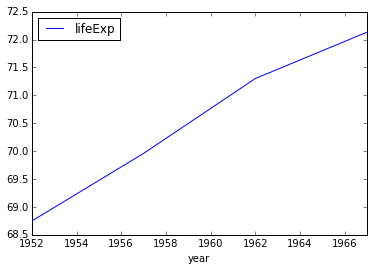

In [11]:
canada_life_exp[['year','lifeExp']].plot(kind='line', x='year', y='lifeExp')
pass

In [12]:
loc = gapminder_5060['country'].isin(['Canada','United States','Mexico'])
us_mexico_ca = gapminder_5060.loc[loc]

> Stretch goal: Add lines for Mexico and United States.



In order to do this in pandas, we must index by country and year

In [13]:
indexed_by_country = us_mexico_ca.set_index(['country','year'])


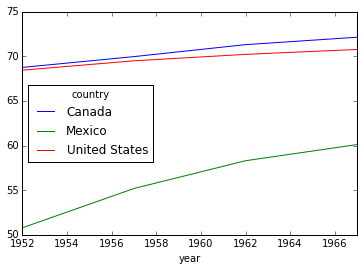

In [14]:
indexed_by_country.unstack(level=0).plot(kind='line',y='lifeExp')
pass